## Shelf slope and vertical transport through lid correction 

In [114]:
#import gsw as sw # Gibbs seawater package

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

#from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

In [115]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import MetricsPythonTools as mpt


In [116]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [117]:
# plotting functions
def plotCanyonPos(ax,UpX,DnX):
    ax.axvline(UpX,color='0.70',linestyle='--')
    ax.axvline(DnX,color='0.70',linestyle='--')


In [118]:
#Exp
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc' 
CGridOut = Dataset(CGrid)

CGridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc' 
CGridNoCOut = Dataset(CGridNoC)

#------------------------------------------------------------------------------------
state = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc' 


#------------------------------------ Kv ----------------------------------------------
state11 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/stateGlob.nc' 
state12 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/stateGlob.nc' 

#----------------------------------- N -----------------------------------------------
state14 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/stateGlob.nc' 
state15 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/stateGlob.nc' 
state16 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/stateGlob.nc' 
state17 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/stateGlob.nc' 

#---------------------------------- f --------------------------------------------------
state18 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/stateGlob.nc' 
state19 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/stateGlob.nc' 

#---------------------------------- Kv 3D ----------------------------------------------
state043D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/stateGlob.nc' 
state053D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/stateGlob.nc' 
state063D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/stateGlob.nc' 
state073D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/stateGlob.nc' 




In [119]:
stateFiles = ['/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc', 
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/stateGlob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/stateGlob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/stateGlob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/stateGlob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/stateGlob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/stateGlob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/stateGlob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/stateGlob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/stateGlob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/stateGlob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/stateGlob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/stateGlob.nc' ]

expName = ['run03', 
       'run11' ,
       'run12' ,
       'run14' ,
       'run15' ,
       'run16' ,
       'run17' ,
       'run18' ,
       'run19' ,
       '3DDIFF/run04' ,
       '3DDIFF/run05' ,
       '3DDIFF/run06' ,
       '3DDIFF/run07' ]

In [120]:
fluxFiles = ['/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR01Glob.nc', 
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/FluxTR02Glob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/FluxTR03Glob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/FluxTR01Glob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/FluxTR01Glob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/FluxTR01Glob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/FluxTR03Glob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/FluxTR01Glob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/FluxTR01Glob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/FluxTR01Glob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/FluxTR01Glob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/FluxTR01Glob.nc' ,
              '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/FluxTR01Glob.nc' ]



In [121]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 22 # number of tracers in total (CNT =22, 3D = 4, total = 19)

rc = CGridNoCOut.variables['RC']
dxf = CGridNoCOut.variables['dxF']
dxC = CGridNoCOut.variables['dxC']
xc = rout.getField(CGridNoC, 'XC') # x coords tracer cells
yc = rout.getField(CGridNoC, 'YC') # y coords tracer cells

rA = rout.getField(CGridNoC, 'rA') 
depth = rout.getField(CGrid, 'Depth')
drF = CGridNoCOut.variables['drF'] # vertical distance between faces
drC = CGridNoCOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGridNoC, 'HFacC')
mask_NoC = rout.getMask(CGridNoC, 'HFacC')

labels = ['Kv: out=1E-7, in=1E-3, Kiso=1','Kv: out=1E-7,in=1E-4, Kiso=1','Kv: out=1E-5, in=1E-3, Kiso=1',
          'Kv: out=1E-5, in=1E-4, Kiso=1','Kv=1E-5, Kiso=1','Kv=1E-4, Kiso=1','Kv=1E-3, Kiso=1','Kv=3.8E-5, Kiso=10',
          'Kv=2.8E-5, Kiso=10','Kv=1.3E-5, Kiso=10','Kv_noc=1E-5, Kiso=1','Kv_noc=1E-4, Kiso=1','Kv_noc=1E-3, Kiso=1',
          'Kv=1E-5, Kiso=10','Kv=1E-4, Kiso=10','Kv=1E-3, Kiso=10','Kv=1E-5, Kiso=0.1','Kv=1E-4, Kiso=0.1','Kv=1E-3, Kiso=0.1',
          'Kv=3.8E-5, Kiso=1','Kv=2.8E-5, Kiso=1','Kv=1.3E-5, Kiso=1']

times = np.arange(0,nt,1)

#print(drC[:])
#print(np.shape(drC))

In [122]:
def findLidInd(MaskC,ySB=227,yFin=267):
    '''INPUT----------------------------------------------------------------------------------------------------------------
    MaskC: Flat shelf mask (3D )
    ySB: y-index shelf break
    yFin: y-index inner coast
    
    OUTPUT----------------------------------------------------------------------------------------------------------------
    ind: np array size (yFin-ySB,nx) with z-indices corresponding to the canyon lid                                              
    -----------------------------------------------------------------------------------------------------------------------
    '''
    ind = np.ma.argmax(MaskC[:,ySB:yFin,:], axis=0, fill_value=None)
    return ind


#-----------------------------------------------------------------------------------------------------------------------
def throughLid(Fld,ind,ySB=227):
    '''
    INPUT----------------------------------------------------------------------------------------------------------------
    Fld : Np array 
    ind: Z indices from findLidInd, 2D
    ySB: initial y index (shelf break index)
    
    OUTPUT----------------------------------------------------------------------------------------------------------------
    FldInd: np array size (nt,1,ny,nx)                                             
    -----------------------------------------------------------------------------------------------------------------------
    '''
    nt = np.shape(Fld)[0]
    nx = np.shape(Fld)[2]
    nyind = np.shape(ind)[0]

    FldInd = np.zeros((nt,1,nyind,nx))
    
    for xx in np.arange(nx):
        for yy in  np.arange(nyind):
            for tt in np.arange(nt):
                FldInd[tt,0,yy,xx] = Fld[tt,ind[yy,xx],yy+ySB,xx]

    return (FldInd)


#-----------------------------------------------------------------------------------------------------------------------
def angleCorrection(Field,angle):
    '''Angle in radians and the field we want to project. Returns projected field.'''
    
    return (Field*np.cos(angle))

#-----------------------------------------------------------------------------------------------------------------------
def lidArea(ind, hFacC,dxC,rA,drC,ySB=227):
    '''
    INPUT----------------------------------------------------------------------------------------------------------------
    
    ind: Z indices from findLidInd, 2D
    ySB: initial y index (shelf break index)
    hFacC: fraction of open cell
    dxC: x-spacing between faces
    rA: cell face area
    drF: spacing between cell faces
    OUTPUT----------------------------------------------------------------------------------------------------------------
    Area: shape like ind                                       
    -----------------------------------------------------------------------------------------------------------------------
    '''
    
    nx = np.shape(ind)[1]
    nyind = np.shape(ind)[0]

    Area = np.zeros((nyind,nx))
    
    for xx in np.arange(nx):
        for yy in  np.arange(nyind):
            Area[yy,xx] = ((rA[yy+ySB,xx]**2)+(hFacC[ind[yy,xx],yy+ySB,xx]*drC[ind[yy,xx]])**2)**(0.5)
            

    return (Area)


y index for shelfbreak, 100m depth and 50 m depth
depth[227,0] is 147.753973 
depth[267,0] is 100.000000 
depth[359,0] is 20.000000 


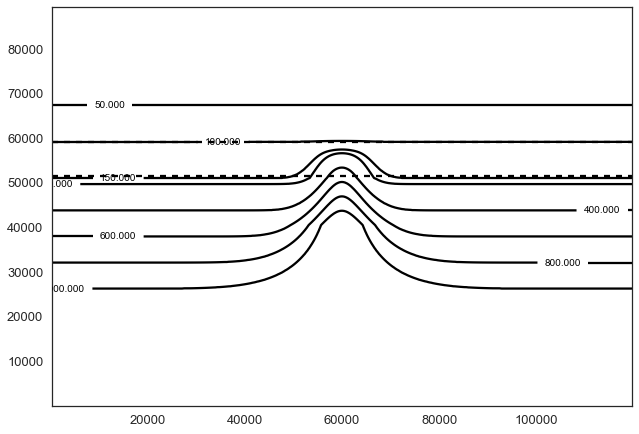

In [123]:
contour = plt.contour(xc[1,:],yc[:,1],depth,[50,100,150,200,400,600,800,1000,1200],colors='k')
plt.clabel(contour, inline=1, fontsize=10)
plt.axhline(yc[267,1],color='k',linestyle='--')
plt.axhline(yc[227,1],color='k',linestyle='--')

print('y index for shelfbreak, 100m depth and 50 m depth')
print('depth[227,0] is %f ' % depth[227,0])
print('depth[267,0] is %f ' % depth[267,0])
print('depth[359,0] is %f ' % depth[359,0])

Canyon rim depth at y[245,240]=54926.234568 is 129.101986 m 
-127.5


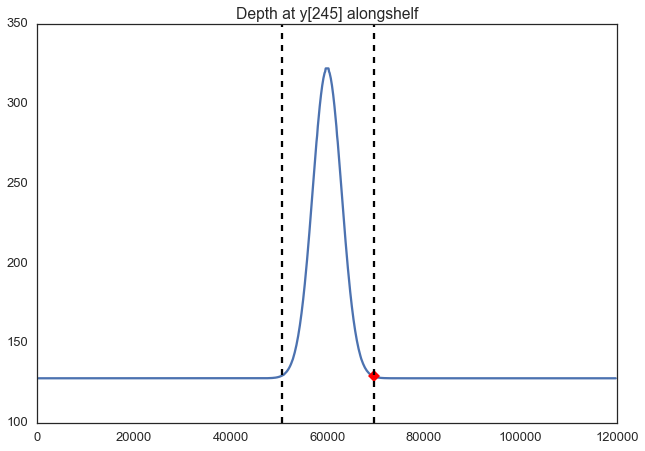

In [135]:
plt.plot(xc[245,:],depth[245,:])
plt.plot(xc[245,240],depth[245,240],'rD')

plt.axvline(xc[1,120],color='k',linestyle='--')
plt.axvline(xc[1,240],color='k',linestyle='--')
plt.title('Depth at y[245] alongshelf')

print('Canyon rim depth at y[245,240]=%f is %f m ' % (yc[245,240],depth[245,240]))
print(rc[25])
#print('depth[359,0] is %f ' % depth[359,0])

In [10]:
W = rout.getField(state, 'W')

## Calculate slope

y index for shelfbreak, 100m depth and 50 m depth
depth[227,0] is 147.753973 m and yc[227,0] is 51670.679012 m
depth[267,0] is 100.000000 m and yc[267,0] is 59445.726983 m
depth[359,0] is 20.000000 m and yc[359,0] is 89781.388162 m


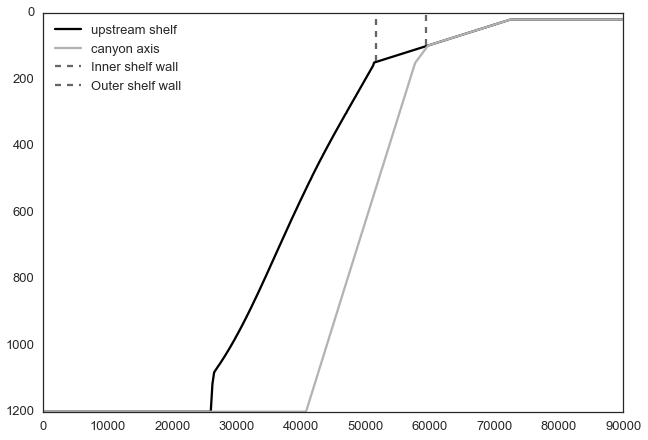

In [126]:
plt.plot(yc[:,1],depth[:,100],color='k',label='upstream shelf')
plt.plot(yc[:,1],depth[:,180],color='0.70',label='canyon axis')

plt.axvline(yc[267,1],ymin=0.92,ymax=1.0,color='0.40',linestyle='--',label = 'Inner shelf wall')
plt.axvline(yc[227,1],ymin =0.88,ymax=1.0,color='0.40',linestyle='--',label = 'Outer shelf wall')


plt.gca().invert_yaxis()
plt.legend(loc=0)
print('y index for shelfbreak, 100m depth and 50 m depth')
print('depth[227,0] is %f m and yc[227,0] is %f m' % (depth[227,0],yc[227,0]))
print('depth[267,0] is %f m and yc[267,0] is %f m'  % (depth[267,0],yc[267,0]))
print('depth[359,0] is %f m and yc[359,0] is %f m' % (depth[359,0],yc[359,0]))


In [12]:
slope = -(depth[267,1]-depth[227,1])/(yc[267,1]-yc[227,1]) # I want it to be positive for this case

print('The slope is:')
print(slope)

alpha = atan(slope)
print(' ')
print('The associated angle is (rad):')
print(alpha)


print(' ')
print('In deg:')
print(degrees(alpha))


The slope is:
0.00614195218077
 
The associated angle is (rad):
0.00614187495038
 
In deg:
0.351903512954


### Get indices of the shelf bottom from flat shelf mask

In [13]:
#IndShelfBot = 
ind = np.ma.argmax(mask_NoC[:,226:267,:], axis=0, fill_value=None)
print(np.shape(ind))
print(ind[:,240])

(41, 360)
[30 30 30 30 29 29 29 29 29 28 28 28 28 27 27 27 27 26 26 26 26 26 25 25 25
 25 24 24 24 24 23 23 23 23 22 22 22 22 21 21 21]


<matplotlib.contour.QuadContourSet instance at 0x7f1cd5a01bd8>

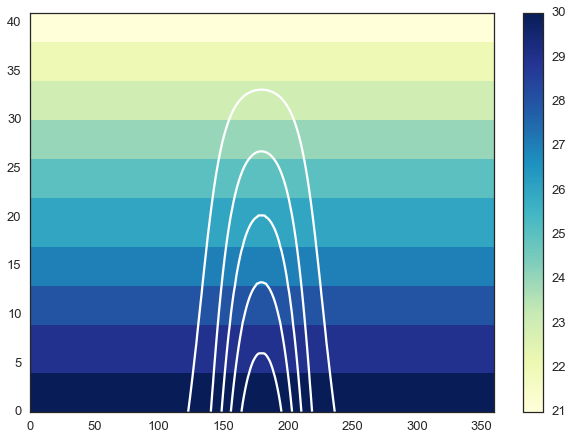

In [14]:
pcol=plt.pcolor(ind, cmap = 'YlGnBu')
plt.colorbar(pcol)
plt.contour(depth[225:267,:],colors = 'w')

<matplotlib.colorbar.Colorbar instance at 0x7f1cd4d64050>

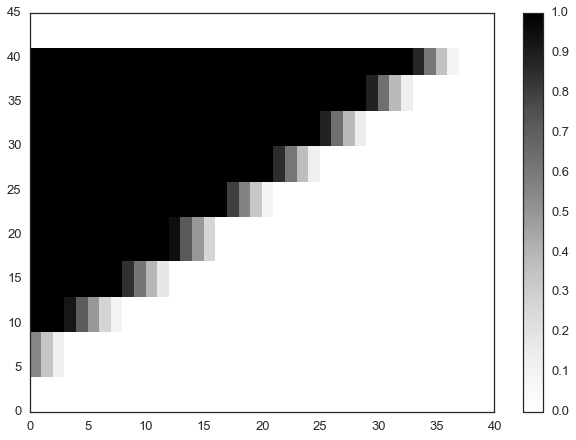

In [15]:
pcol = plt.pcolor(hFacC[ind[:,180],227:267,180])
plt.colorbar(pcol)
#print(hFacC[ind[:,180],227:267,180])

In [47]:
nt = np.shape(W)[0]
nx = np.shape(W)[2]
nyind = np.shape(ind)[0]

Wind = np.zeros((nt,1,nyind,nx))

for xx in np.arange(359):
    for yy in  np.arange(0,41,1):
        #print(yy)
        for tt in np.arange(0,nt,1):
            Wind[tt,0,yy,xx] = W[tt,ind[yy,xx],yy+227,xx]





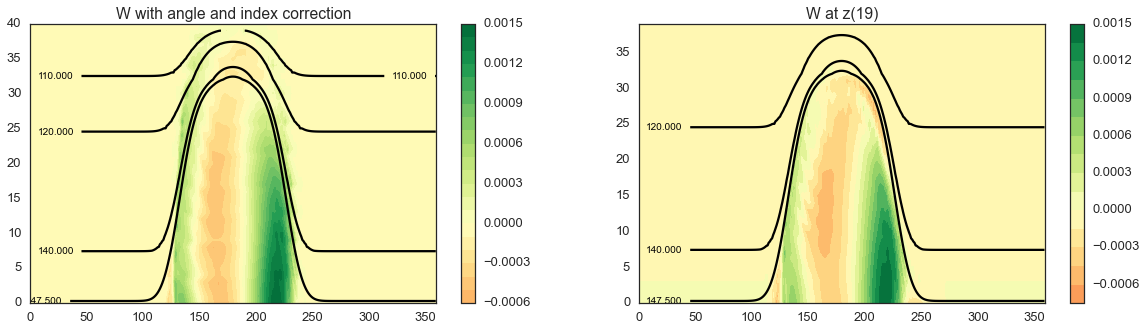

In [55]:
fig = plt.figure(figsize=(20,5))
ax1= plt.subplot(1,2,1)

pcol1 = ax1.contourf(Wind[6,0,:,:]*np.cos(alpha),20,vmax = 0.0015,vmin=-0.0015, cmap = 'RdYlGn')
plt.colorbar(pcol1)
cnt1=ax1.contour(depth[227:267,:],[110,120,140,147.5],colors = 'k')
plt.clabel(cnt1)
ax1.set_title('W with angle and index correction')
ax2 = plt.subplot(1,2,2)

pcol2 = ax2.contourf(W[6,29,227:267,:], 20,vmax = 0.0015,vmin=-0.0015,cmap = 'RdYlGn')
plt.colorbar(pcol2)
cnt2 = ax2.contour(depth[227:267,:],[100,120,140,147.5],colors = 'k')
plt.clabel(cnt2)
ax2.set_title('W at z(19)')

## Calculate transport of water through lid

$$Trans = W\cdot A_{Lid} + V \cdot A_{Lid}$$
$$=WA_{Lid} \cos(\alpha) + VA_{Lid}\sin(\alpha)$$

U has no contribution to the transport since it is paralell to the lid
$$A_{lid}_{ijk} = \sqrt{rA^2_{ij}+dxC^2_{ij}(drC_{k}^2hFacC^2_{ijk})}$$


In [93]:
indVert = findLidInd(mask_NoC,ySB=227,yFin=267)

Area = lidArea(indVert, hFacC,dxC,rA,drC,ySB=227)

print('Lid area is %f m^2' %np.sum(Area))


Lid area is 930011048.564996 $m^2$


In [98]:
vertTrans = np.zeros((nt,len(stateFiles)))

ii = 0
for stateFile in stateFiles:
    
    print(stateFile)
    
    W = rout.getField(stateFile, 'W')
    
    Vstag = rout.getField(stateFile, 'V')
    V = (Vstag[:,:,:-1,:]+Vstag[:,:,1:,:])/2.0
    
    Windices = throughLid(W,indVert,227)
    Vindices = throughLid(V,indVert,227)
    
    WA = Area*Windices
    VA = Area*Vindices
    
    Wcorrected = WA*cos(alpha)
    Vcorrected = -VA*sin(alpha)
    
    vertTrans[:,ii] = np.squeeze(np.sum(np.sum(Wcorrected+Vcorrected, axis = 2),axis=2))
    ii=ii+1

raw_data = {'run03': vertTrans[:,0],
            'run11': vertTrans[:,1],
            'run12': vertTrans[:,2],
            'run14': vertTrans[:,3],
            'run15': vertTrans[:,4],
            'run16': vertTrans[:,5],
            'run17': vertTrans[:,6],
            'run18': vertTrans[:,7],
            'run19': vertTrans[:,8],
            'run043D': vertTrans[:,9],
            'run053D': vertTrans[:,10],
            'run063D': vertTrans[:,11],
            'run073D': vertTrans[:,12]}

df = pd.DataFrame(raw_data, columns = ['run03',
                                       'run11',
                                       'run12',
                                       'run14',
                                       'run15',
                                       'run16',
                                       'run17',
                                       'run18',
                                       'run19',
                                       'run043D',
                                       'run053D',
                                       'run063D',
                                       'run073D'])
    
filename1 = ('results/metricsDataFrames/VertTransWater_Lid.csv' )
df.to_csv(filename1)
    
print(filename1)

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/stateGlob.nc
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/stateGlob.nc
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/stateGlob.nc
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/stateGlob.nc
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/stateGlob.nc
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/stateGlob.nc
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/stateGlob.nc
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/stateGlob.nc
/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/stateGlob.nc
/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/stateGlob.nc
/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/stateGlob.nc
/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/stateGlob.nc
results/metricsDataFrames/VertTransWater_Lid.csv


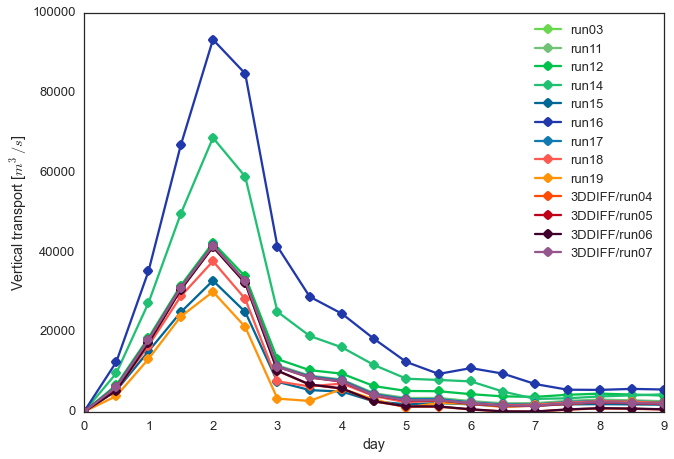

In [100]:
colors = ['fresh green','soft green','shamrock green','dark mint green', 'peacock blue','sapphire','nice blue','coral',
          'tangerine','blood orange','scarlet','dark plum','purplish','cerise','amethyst','lavender pink']
color_pal = sns.xkcd_palette(colors)
sns.set_palette(color_pal)

times = np.arange(nt)

for ii,name in zip(np.arange(len(stateFiles)),expName):
    plt.plot(times/2.0,vertTrans[:,ii],'o-',label = name)
    
plt.legend(loc=0)
plt.xlabel('day')
plt.ylabel('Vertical transport [$m^3/s$]')

## Correct advective flux through lid 

In [109]:
nt=19
vertTrans = np.zeros((nt-1,len(fluxFiles)))

ii = 0

tracers = ['01','02','03','01','01','01','03','01','01','01','01','01','01']

for fluxFile, field in zip(fluxFiles,tracers):
    
    print(fluxFile)
    
    W = rout.getField(fluxFile, ('ADVrTr%s' %field))
    
    Vstag = rout.getField(fluxFile, ('ADVyTr%s' %field))
    
    V = (Vstag[:,:,:-1,:]+Vstag[:,:,1:,:])/2.0
    
    Windices = throughLid(W,indVert,227)
    Vindices = throughLid(V,indVert,227)
    print(np.shape(Vindices))
    Wcorrected = Windices*cos(alpha)
    Vcorrected = -Vindices*sin(alpha)
    
    vertTrans[:,ii] = np.squeeze(np.sum(np.sum(Wcorrected+Vcorrected, axis = 2),axis=2))
    ii=ii+1

raw_data = {'run03': vertTrans[:,0],
            'run11': vertTrans[:,1],
            'run12': vertTrans[:,2],
            'run14': vertTrans[:,3],
            'run15': vertTrans[:,4],
            'run16': vertTrans[:,5],
            'run17': vertTrans[:,6],
            'run18': vertTrans[:,7],
            'run19': vertTrans[:,8],
            'run043D': vertTrans[:,9],
            'run053D': vertTrans[:,10],
            'run063D': vertTrans[:,11],
            'run073D': vertTrans[:,12]}

df = pd.DataFrame(raw_data, columns = ['run03',
                                       'run11',
                                       'run12',
                                       'run14',
                                       'run15',
                                       'run16',
                                       'run17',
                                       'run18',
                                       'run19',
                                       'run043D',
                                       'run053D',
                                       'run063D',
                                       'run073D'])
    
filename1 = ('results/metricsDataFrames/VertTransTrAdv_Lid.csv' )
df.to_csv(filename1)
    
print(filename1)

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/FluxTR02Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/FluxTR03Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/FluxTR03Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExper

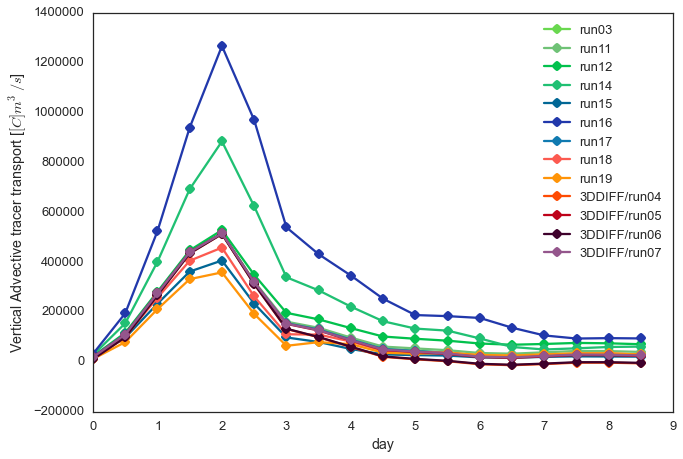

In [111]:
colors = ['fresh green','soft green','shamrock green','dark mint green', 'peacock blue','sapphire','nice blue','coral',
          'tangerine','blood orange','scarlet','dark plum','purplish','cerise','amethyst','lavender pink']
color_pal = sns.xkcd_palette(colors)
sns.set_palette(color_pal)

times = np.arange(nt-1)

for ii,name in zip(np.arange(len(fluxFiles)),expName):
    plt.plot(times/2.0,vertTrans[:,ii],'o-',label = name)
    
plt.legend(loc=0)
plt.xlabel('day')
plt.ylabel('Advective tracer transport through lid [$[C]m^3/s$]')

## Correct diffusive flux through lid

In [112]:
nt=19
vertTrans = np.zeros((nt-1,len(fluxFiles)))

ii = 0

tracers = ['01','02','03','01','01','01','03','01','01','01','01','01','01']

for fluxFile, field in zip(fluxFiles,tracers):
    
    print(fluxFile)
    
    W = rout.getField(fluxFile, ('DFrETr%s' %field))
    Wimp = rout.getField(fluxFile, ('DFrITr%s' %field))
    
    Vstag = rout.getField(fluxFile, ('DFyETr%s' %field))
    V = (Vstag[:,:,:-1,:]+Vstag[:,:,1:,:])/2.0
    
    Windices = throughLid(W,indVert,227)
    Wimpindices = throughLid(Wimp,indVert,227)
    
    Vindices = throughLid(V,indVert,227)
    
    print(np.shape(Vindices))
    Wcorrected = (Windices+Wimpindices)*cos(alpha)
    Vcorrected = -Vindices*sin(alpha)
    
    vertTrans[:,ii] = np.squeeze(np.sum(np.sum(Wcorrected+Vcorrected, axis = 2),axis=2))
    ii=ii+1

raw_data = {'run03': vertTrans[:,0],
            'run11': vertTrans[:,1],
            'run12': vertTrans[:,2],
            'run14': vertTrans[:,3],
            'run15': vertTrans[:,4],
            'run16': vertTrans[:,5],
            'run17': vertTrans[:,6],
            'run18': vertTrans[:,7],
            'run19': vertTrans[:,8],
            'run043D': vertTrans[:,9],
            'run053D': vertTrans[:,10],
            'run063D': vertTrans[:,11],
            'run073D': vertTrans[:,12]}

df = pd.DataFrame(raw_data, columns = ['run03',
                                       'run11',
                                       'run12',
                                       'run14',
                                       'run15',
                                       'run16',
                                       'run17',
                                       'run18',
                                       'run19',
                                       'run043D',
                                       'run053D',
                                       'run063D',
                                       'run073D'])
    
filename1 = ('results/metricsDataFrames/VertTransTrDiff_Lid.csv' )
df.to_csv(filename1)
    
print(filename1)

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/FluxTR02Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/FluxTR03Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/FluxTR03Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/FluxTR01Glob.nc
(18, 1, 40, 360)
/ocean/kramosmu/MITgcm/TracerExper

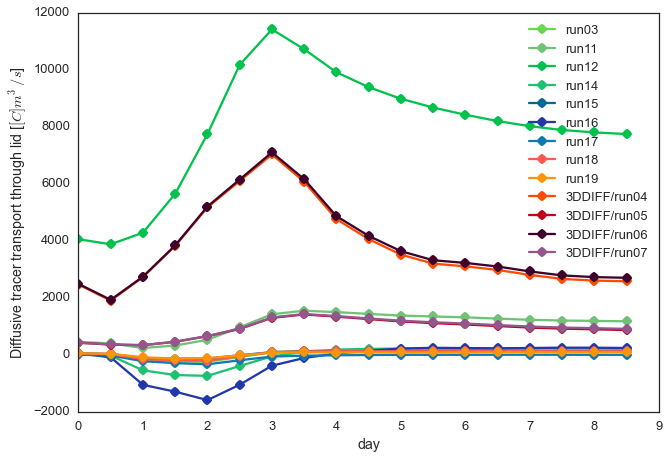

In [113]:
colors = ['fresh green','soft green','shamrock green','dark mint green', 'peacock blue','sapphire','nice blue','coral',
          'tangerine','blood orange','scarlet','dark plum','purplish','cerise','amethyst','lavender pink']
color_pal = sns.xkcd_palette(colors)
sns.set_palette(color_pal)

times = np.arange(nt-1)

for ii,name in zip(np.arange(len(fluxFiles)),expName):
    plt.plot(times/2.0,vertTrans[:,ii],'o-',label = name)
    
plt.legend(loc=0)
plt.xlabel('day')
plt.ylabel('Diffusive tracer transport through lid [$[C]m^3/s$]')